In [1]:
# Usual imports
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

# Import this module manually
import polarplots as pp


# Load example data
ds=xr.open_dataset('pattern.nc', decode_times=False) 
mylat=ds['lat'].values             
mylon=ds['lon'].values
myvar=ds['var151'][0,:,:].values

vmin -3.30, vmax 3.30, inc 0.30
vmin -3.30, vmax 3.30, inc 0.30
vmin -3.30, vmax 3.30, inc 0.30
vmin -3.30, vmax 3.30, inc 0.30
vmin -3.30, vmax 3.30, inc 0.30
vmin -3.30, vmax 3.30, inc 0.30


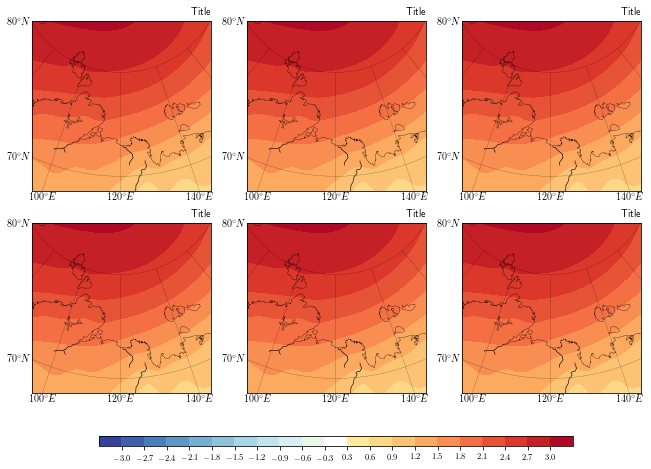

In [2]:
for i in range(6):

    if i==0:
        f=pp.polaranom(mylat,mylon,myvar,projection='laptev',resolution='l',
                      nrows=2,ncols=3,mapid=i+1,rtitle='Title',
                      draw=False)
    elif i==5:
        f=pp.polaranom(mylat,mylon,myvar,projection='laptev',resolution='l',
                      nrows=2,ncols=3,mapid=i+1, figure=f,rtitle='Title',
                      draw=False)
    else:
        f=pp.polaranom(mylat,mylon,myvar,projection='laptev',resolution='l',
                      nrows=2,ncols=3,mapid=i+1, figure=f,rtitle='Title',
                      draw=False)
        
plt.show()
f.savefig('laptev_2x3.png', dpi=300)

vmin -3.30, vmax 3.30, inc 0.30


/sw/jessie-x64/anaconda3-5.0.0/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


vmin -3.30, vmax 3.30, inc 0.30
vmin -3.30, vmax 3.30, inc 0.30
vmin -3.30, vmax 3.30, inc 0.30
vmin -3.30, vmax 3.30, inc 0.30
vmin -3.30, vmax 3.30, inc 0.30
vmin -3.30, vmax 3.30, inc 0.30
vmin -3.30, vmax 3.30, inc 0.30
vmin -3.30, vmax 3.30, inc 0.30
vmin -3.30, vmax 3.30, inc 0.30
vmin -3.30, vmax 3.30, inc 0.30
vmin -3.30, vmax 3.30, inc 0.30


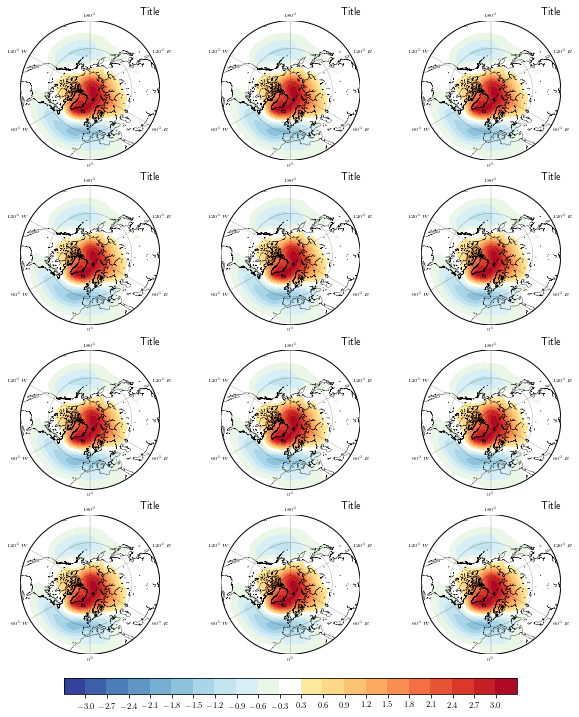

In [23]:
for i in range(12):

    if i==0:
        f=polaranom(mylat,mylon,myvar,
#                     projection='laptev',
                    resolution='l',
                      nrows=4,ncols=3,mapid=i+1,rtitle='Title',
                      draw=False)
    elif i==11:
        f=polaranom(mylat,mylon,myvar,
#                     projection='laptev',
                    resolution='l',
                      nrows=4,ncols=3,mapid=i+1, figure=f,rtitle='Title',
                      draw=False)
    else:
        f=polaranom(mylat,mylon,myvar,
#                     projection='laptev',
                    resolution='l',
                      nrows=4,ncols=3,mapid=i+1, figure=f,rtitle='Title',
                      draw=False)     
plt.show()
f.savefig('laptev_4x3.png', dpi=300)

In [22]:
def draw_round_frame(m, width_percent=0.05, degree=45):
    # Adapted from:
    # https://stackoverflow.com/questions/47431242/matplotlib-create-lat-lon-white-black-round-bounding-box-around-basemap
    from matplotlib.patches import Wedge
    import matplotlib.pyplot as plt
    ax = plt.subplot(111)
    centre_x = (ax.get_xlim()[0] + ax.get_xlim()[1]) / 2
    centre_y = (ax.get_ylim()[0] + ax.get_ylim()[1]) / 2
    width = abs(centre_x) * width_percent

    inner_radius = abs(centre_x) - width/2
    outer_radius = inner_radius + width

    angle_breaks = list(range(0, 361, degree))

    for i, (from_angle, to_angle) in enumerate(list(zip(angle_breaks[:-1], angle_breaks[1:]))):
        color='white' if i%2 == 0 else 'black'
        wedge = Wedge((centre_x, centre_y), outer_radius, from_angle, to_angle, width=outer_radius - inner_radius,
                      facecolor=color,
                      edgecolor='black',
                      clip_on=False,
                      ls='solid',
                      lw=1)
        ax.add_patch(wedge)

def myround(x, prec=1, base=.5):
    return round(base * round(float(x)/base),prec)

def myround50(x, prec=1, base=50):
    return round(base * round(float(x)/base),prec)

def myround100(x, prec=1, base=100):
    return round(base * round(float(x)/base),prec)

def myround01(x, prec=1, base=.1):
    return round(base * round(float(x)/base),prec)

def getRange(var,vmin,vmax,inc):
    import numpy as np
    mymin=np.float(np.nanmin(var))
    mymax=np.float(np.nanmax(var))
    if abs(mymin)>abs(mymax):
        vmin=mymin
        vmax=-mymin
    else:
        vmin=-mymax
        vmax=mymax
    if abs(vmax)>1 and abs(vmax)<10 and myround(vmax)>vmax:
        vmax=myround(vmax)
        vmin=myround(vmin)
        if ((vmax*10)%10)==0:
            inc=vmax/10
        else:
            inc=0.5
    elif abs(vmax)>1 and abs(vmax)<10 and myround(vmax)<vmax:
        vmax=myround(vmax)
        vmin=myround(vmin)
        if ((vmax*10)%10)==0:
            inc=vmax/10
        else:
            inc=0.5
        vmax=vmax+inc
        vmin=vmin-inc
    elif abs(vmax)>10 and abs(vmax)<100 and round(vmax,0)>vmax:
        vmax=round(vmax,0)
        vmin=round(vmin,0)
        inc=vmax/10
    elif abs(vmax)>10 and abs(vmax)<100 and round(vmax,0)<vmax:
        vmax=round(vmax,0)
        vmin=round(vmin,0)
        inc=vmax/10
        vmax=vmax+inc
        vmin=vmin-inc
    elif abs(vmax)>=100 and abs(vmax)<500 and myround50(vmax,0)>vmax:
        vmax=myround50(vmax)
        vmin=myround50(vmin)
        inc=50
    elif abs(vmax)>=100 and abs(vmax)<500 and myround50(vmax,0)<vmax:
        vmax=myround50(vmax)
        vmin=myround50(vmin)
        inc=50
        vmax=vmax+inc
        vmin=vmin-inc
    elif abs(vmax)>=500 and abs(vmax)<1000 and myround50(vmax,0)>vmax:
        vmax=myround50(vmax)
        vmin=myround50(vmin)
        if (vmax%100)==0:
            inc=100
        else:
            vmax=vmax+50
            vmin=vmin-50
            inc=100
    elif abs(vmax)>=500 and abs(vmax)<1000 and myround50(vmax,0)<vmax:
        vmax=myround50(vmax)
        vmin=myround50(vmin)
        if (vmax%100)==0:
            inc=100
        else:
            inc=50
        vmax=vmax+inc
        vmin=vmin-inc
        if (vmax%100)==0:
            inc=100
        else:
            inc=50
    elif abs(vmax)>=1000 and myround100(vmax,0)>vmax:
        vmax=myround100(vmax)
        vmin=myround100(vmin)
        inc=vmax/10
    elif abs(vmax)>=1000 and myround100(vmax,0)<vmax:
        vmax=myround100(vmax)
        vmin=myround100(vmin)
        inc=vmax/10
        vmax=vmax+inc
        vmin=vmin-inc
    elif abs(vmax)>=0.1 and abs(vmax)<=1 and myround01(vmax,0)>vmax:
        vmax=myround01(vmax)
        vmin=myround01(vmin)
        inc=vmax/10
    elif abs(vmax)>=0.1 and abs(vmax)<=1 and myround01(vmax,0)<vmax:
        vmax=myround01(vmax)
        vmin=myround01(vmin)
        inc=myround01(vmax)/10
        vmax=vmax+inc
        vmin=vmin-inc
    elif inc==0:
        inc=vmax/10

    print('vmin %.2f, vmax %.2f, inc %.2f' %(vmin,vmax,inc))
    return vmin, vmax, inc

def getCbar(levels,show0,cmap,ncolors):
        import numpy as np
        from matplotlib import cm
        if show0==0:
            from matplotlib.colors import ListedColormap
            viridis = cm.get_cmap(cmap, 256)
            newcolors = viridis(np.linspace(0, 1, 256))
            white = np.array([1, 1, 1, 1])
            newcolors[int(256/2)-1:int(256/2)+1, :] = white
            newcmp = ListedColormap(newcolors)
            cbar=cm.get_cmap(newcmp,ncolors)
        else:
            cbar=cm.get_cmap(cmap,ncolors)

        if len(levels)>22 and len(levels)<49 and show0==0:
            cblevels=np.concatenate((levels[1:int((len(levels)/2)+1):2],levels[int(len(levels)/2):-1:2]))
        elif len(levels)<=22 and show0==0:
            cblevels=levels[1:-1]
        elif len(levels)<=22 and show0==1:
            cblevels=levels[1:-1]
        else:
            cblevels=levels[1:-1:2]
        return cbar, cblevels

def drawbox(boxlat,boxlon,m,boxcol,boxlw,boxls):
    from mpl_toolkits.basemap import Basemap, addcyclic
    import matplotlib.pyplot as plt
    import numpy as np
    for l in range(len(boxlat)-1):
        linlat = np.linspace(boxlat[l],boxlat[l+1])
        linlon = np.linspace(boxlon[l],boxlon[l+1])
        xs,ys = m(linlon,linlat)
        m.plot(xs,ys, lw=boxlw, ls=boxls, color=boxcol)
    return

def addcyc(var,lon):
    from mpl_toolkits.basemap import addcyclic
    var_c, lon_c = addcyclic(var, lon)
    return var_c, lon_c

def getBasemap(projection,lat0,resolution,lon_c,lat,drawMeridians,drawParallels,meridFontsize,coastlw,meridlw,hemisphere):
    from mpl_toolkits.basemap import Basemap
    import numpy as np
    
    # Polar Sereographic Projection
    if projection=='polar':
        if hemisphere=='N' or hemisphere=='n':
            proj='npstere'
        elif hemisphere=='S' or hemisphere=='s':
            proj='spstere'
        else:
            print('Invalid hemisphere: should be "N" or "S" for projection="polar".')
        m = Basemap(projection=proj,lat_0=90,lon_0=0,boundinglat=lat0,resolution=resolution,round=True)
        if drawMeridians==True:
            m.drawmeridians(np.arange(0, 359, 60), labels=[1,1,0,0],linewidth=meridlw, fontsize=meridFontsize)
        if drawParallels==True:
            m.drawparallels(np.arange(-90, 91, 45),linewidth=meridlw)
            
    # Laptev Projection (Lambert Azimuthal)
    elif projection=='laptev_lamb':
        llcrnrlon=90
        urcrnrlon=180
        llcrnrlat=67
        urcrnrlat=75
        m = Basemap(llcrnrlon=llcrnrlon,llcrnrlat=llcrnrlat,urcrnrlon=urcrnrlon,urcrnrlat=urcrnrlat,
            resolution=resolution,projection='laea',lat_ts=80,lat_0=urcrnrlat-llcrnrlat,lon_0=urcrnrlon-llcrnrlon)
        if drawMeridians==True:
            m.drawmeridians(np.arange(90, urcrnrlon, 20), labels=[0,1,0,1],linewidth=meridlw)
        if drawParallels==True:
            m.drawparallels(np.arange(60, urcrnrlat+10, 10),labels=[1,0,0,0],linewidth=meridlw)
    
    # Laptev in Cassini Projection      
    elif projection=='laptev_cass':
        llcrnrlon=90
        urcrnrlon=170
        llcrnrlat=73
        urcrnrlat=71
        m = Basemap(llcrnrlon=llcrnrlon,llcrnrlat=llcrnrlat,urcrnrlon=urcrnrlon,urcrnrlat=urcrnrlat,
            resolution=resolution,projection='cass',lon_0=urcrnrlon-llcrnrlon,lat_0=urcrnrlat-llcrnrlat)
        if drawMeridians==True:
            m.drawmeridians(np.arange(90, urcrnrlon, 20), labels=[0,1,0,1],linewidth=meridlw)
        if drawParallels==True:
            m.drawparallels(np.arange(60, urcrnrlat+20, 10),labels=[1,1,0,0],linewidth=meridlw)
    
    # Laptev + a bit of Kara and East Siberian Seas
    elif projection=='laptev_extended_lamb':
        llcrnrlon=70
        urcrnrlon=190
        llcrnrlat=65
        urcrnrlat=85
        m = Basemap(llcrnrlon=llcrnrlon,llcrnrlat=llcrnrlat,urcrnrlon=urcrnrlon,urcrnrlat=urcrnrlat,
                    resolution=resolution,projection='lcc',
                    lat_ts=50,lat_0=urcrnrlat-llcrnrlat,lon_0=urcrnrlon-llcrnrlon)
        if drawMeridians==True:
            m.drawmeridians(np.arange(llcrnrlon, urcrnrlon, 30), labels=[0,0,0,1],linewidth=meridlw)
        if drawParallels==True:
            m.drawparallels(np.arange(60, urcrnrlat+10, 10),labels=[1,0,0,0],linewidth=meridlw)
    
    # Laptev + East Siberian Seas       
    elif projection=='laptev_east':
        llcrnrlon=95
        urcrnrlon=199
        llcrnrlat=65
        urcrnrlat=81
        m = Basemap(llcrnrlon=llcrnrlon,llcrnrlat=llcrnrlat,urcrnrlon=urcrnrlon,urcrnrlat=urcrnrlat,
                    resolution=resolution,projection='lcc',rsphere=(6378137.00,6356752.3142),
                    lat_ts=50,lat_0=urcrnrlat-llcrnrlat,lon_0=urcrnrlon-llcrnrlon)
        if drawMeridians==True:
            m.drawmeridians(np.arange(llcrnrlon, urcrnrlon, 30), labels=[0,0,0,1],linewidth=meridlw)
        if drawParallels==True:
            m.drawparallels(np.arange(60, urcrnrlat+10, 10),labels=[1,0,0,0],linewidth=meridlw)
    
    # Simply Laptev
    elif projection=='laptev':
        llcrnrlon=97.5
        urcrnrlon=180
        llcrnrlat=67
        urcrnrlat=80
        m = Basemap(llcrnrlon=llcrnrlon,llcrnrlat=llcrnrlat,urcrnrlon=urcrnrlon,urcrnrlat=urcrnrlat,
                    resolution=resolution,projection='cass',lon_0=120,lat_0=20)
        if drawMeridians==True:
            m.drawmeridians(np.arange(80, urcrnrlon, 20), labels=[0,0,0,1],linewidth=meridlw)
        if drawParallels==True:
            m.drawparallels(np.arange(60, 90, 10),labels=[1,0,0,0],linewidth=meridlw)     
            
    # Laptev with Zoom out
    elif projection=='laptev_extended':
        llcrnrlon=92.7
        urcrnrlon=197
        llcrnrlat=61
        urcrnrlat=77
        m = Basemap(llcrnrlon=llcrnrlon,llcrnrlat=llcrnrlat,urcrnrlon=urcrnrlon,urcrnrlat=urcrnrlat,
                    resolution=resolution,projection='cass',lon_0=120,lat_0=20, lat_ts=86)
        if drawMeridians==True:
            m.drawmeridians(np.arange(60, urcrnrlon, 20), labels=[0,0   ,0,1],linewidth=meridlw)
        if drawParallels==True:
            m.drawparallels(np.arange(60, urcrnrlat+20, 10),labels=[1,0,0,0],linewidth=meridlw)
            
    # Eurasia 1
    elif projection=='eurasia1':
        llcrnrlon=0
        urcrnrlon=180
        llcrnrlat=20
        urcrnrlat=90
        m = Basemap(llcrnrlon=llcrnrlon,llcrnrlat=llcrnrlat,urcrnrlon=urcrnrlon,urcrnrlat=urcrnrlat,
                    resolution=resolution,projection='cyl')
        if drawMeridians==True:
            m.drawmeridians(np.arange(0, 210, 30), labels=[0,1,0,1],linewidth=meridlw)
        if drawParallels==True:
            m.drawparallels(np.arange(20, 90, 20),labels=[1,0,0,0],linewidth=meridlw)
            
    # Eurasia 2
    elif projection=='eurasia2':
        llcrnrlon=-30
        urcrnrlon=180
        llcrnrlat=20
        urcrnrlat=90
        m = Basemap(llcrnrlon=llcrnrlon,llcrnrlat=llcrnrlat,urcrnrlon=urcrnrlon,urcrnrlat=urcrnrlat,
                    resolution=resolution,projection='cyl')
        if drawMeridians==True:
            m.drawmeridians(np.arange(-30, 210, 30), labels=[0,1,0,1],linewidth=meridlw)
        if drawParallels==True:
            m.drawparallels(np.arange(20, 90, 20),labels=[1,0,0,0],linewidth=meridlw)
            
    # Pacific - South America
    elif projection=='pas':
        llcrnrlat=-60
        urcrnrlat=10
        llcrnrlon=-180
        urcrnrlon=-30
        m = Basemap(llcrnrlon=llcrnrlon,llcrnrlat=llcrnrlat,urcrnrlon=urcrnrlon,urcrnrlat=urcrnrlat,
                    resolution=resolution,projection='cyl')
        if drawMeridians==True:
            m.drawmeridians(np.arange(-180, 0, 30), labels=[0,1,0,1],linewidth=meridlw)
        if drawParallels==True:
            m.drawparallels(np.arange(-60, 30, 15),labels=[1,0,0,0],linewidth=meridlw)
    
    # No proper projection given    
    else:
        print('ERROR: Invalid projection. Options available:')
        print('polar, laptev, laptev_extended, laptev_lamb, laptev_extended_lamb, laptev_east, laptev_cass')
            
    m.drawcoastlines(linewidth=coastlw)
    x, y = m(*np.meshgrid(lon_c,lat))
    return m, x, y

def polaranom(lat=False,lon=False,var=False,vmin=0,vmax=0,inc=0,lat0=False,frame=0,rtitle='',ltitle='',
              clabel='',colorbar=1,usetex=True,
              zeroline=0,cmap='RdYlBu_r',contours=0,hemisphere='N',cbfontsize=8,show0=0,shrink=0.8,
              rtitfontsize=10, ltitfontsize=10,
              resolution='c',figsize=(8,8),commonbar=None,projection='polar',fillcont=False,
              nrows=1,ncols=1,mapid=1,draw=True,block=True,interp=True,
              drawMeridians=True, drawParallels=True,meridFontsize=7,coastlw=0.3,meridlw=0.3,
              boxlat=False,  boxlon=False,  boxcol='k',  boxlw=2,  boxls='-',
              boxlat2=False, boxlon2=False, boxcol2='k', boxlw2=2, boxls2='-',
              boxlat3=False, boxlon3=False, boxcol3='k', boxlw3=2, boxls3='-',
              boxlat4=False, boxlon4=False, boxcol4='k', boxlw4=2, boxls4='-',
              boxlat5=False, boxlon5=False, boxcol5='k', boxlw5=2, boxls5='-',
              figure=False, autoformat=True, returnxy=False, tight=False,
              ts=False,tsx=False,tsy=False,
              u=False,v=False,skipx=1,skipy=1,scale=1,drawVecLabel=True,nxv=40,nyv=40,
              vecunit='m/s',vwidth=4,vlength=4,vaxislength=3,vecmag=False,lon0360=True,
              gxoutc=False, gxoutclevs=False, gxoutccol='k', gxoutclabel=False,gxoutclw=1,
              gxoutclabelfmt='%0.f',
              mklat=False,mklon=False,markersymbol='o',markersize=10,
              markerfacecolor='lime',markeredgecolor='lime',wspace=0.1,hspace=0.1):
    
    from matplotlib import rc
    rc('text', usetex=usetex)

    if ts==False:
        # Format set-ups:
        if autoformat:
            if (nrows==4 and ncols==3):
                figsize=(9,11)
                meridFontsize=5
                cbfontsize=8
                colorbar=0
                hspace=0.18
                if mapid==1:
                    commonbar='h'
                    bottom=0.1
                    cbarcoords=[0.15, 0.1, 0.7, 0.02]
            elif (nrows==2 and ncols==2):
                figsize=(10,10)
                meridFontsize=7
                cbfontsize=8
                colorbar=0
                if mapid==1:
                    commonbar='h'
                    bottom=0.1
                    cbarcoords=[0.15, 0.06, 0.7, 0.02]
            elif (nrows==2 and ncols==3):  #### here
                figsize=(9.4,6.7)
                meridFontsize=6
                cbfontsize=8
                colorbar=0
                if mapid==1:
                    commonbar='h'
                    bottom=0.1
                    cbarcoords=[0.15, 0.055, 0.7, 0.02]
            elif (nrows==3 and ncols==2):            
                figsize=(7,10)
                meridFontsize=7
                cbfontsize=8
                colorbar=0
                if mapid==1:
                    commonbar='h'
                    bottom=0.1
                    cbarcoords=[0.15, 0.055, 0.7, 0.02]
            elif (nrows==1 and ncols==3):
                figsize=(12,5)
                meridFontsize=7
                cbfontsize=8
                colorbar=0
                if mapid==1:
                    commonbar='h'
                    bottom=0.15
                    cbarcoords=[0.15, 0.1, 0.7, 0.04]
            elif (nrows==1 and ncols==2):              
                meridFontsize=10
                cbfontsize=12
                colorbar=0
                if mapid==1:
                    if commonbar=='v':
                        figsize=(10,4.4)
                        bottom=0.0
                        cbarcoords=[0.85, 0.05, 0.02, 0.90]
                    else:
                        commonbar='h'
                        figsize=(9,5)
                        bottom=0.18
                        cbarcoords=[0.15, 0.09, 0.7, 0.04]
            elif (nrows==3 and ncols==1):
                figsize=(5,12)
                meridFontsize=7
                cbfontsize=8
                colorbar=0
                if mapid==1:
                    commonbar='h'
                    bottom=0.1
                    cbarcoords=[0.15, 0.05, 0.7, 0.02]
            elif (nrows==2 and ncols==1): ############### here
                meridFontsize=6
                cbfontsize=6
                colorbar=0
                if mapid==1:
                    if commonbar=='v':
                        figsize=(4.2,6.7)
                        cbarcoords=[0.84, 0.22, 0.04, 0.56] 
                    else:
                        figsize=(4,6.7)
                        commonbar='h'
                        bottom=0.10
                        cbarcoords=[0.1, 0.055, 0.82, 0.02]
            elif ((nrows!=1 or ncols!=1) and mapid==1):
                    if commonbar=='h':
                        cbarcoords=[0.17, 0.05, 0.66, 0.02]
                        bottom=0.1
                    elif commonbar=='v':
                        cbarcoords=[0.85, 0.15, 0.02, 0.7]
            else:
                bottom=0.35
                top=0.87
                cbarcoords=[0.15, 0.27, 0.7, 0.022]

        import numpy as np
        from mpl_toolkits.basemap import Basemap, addcyclic
        import matplotlib.pyplot as plt

        if mapid==1:
            figure=plt.figure(figsize=figsize)
        ax = plt.subplot(nrows,ncols,mapid)

        if vmin==0 and vmax==0 and inc==0:
            vmin, vmax, inc =getRange(var,vmin,vmax,inc)

        var[var>=vmax]=vmax-0.01*inc
        var[var<=vmin]=vmin+0.01*inc

        if show0==1:
            ncolors=np.shape(np.arange(vmin,vmax,inc))[0]
            levels=np.arange(vmin,vmax+inc,inc)
        elif show0==0:
            ncolors=np.shape(np.arange(vmin,vmax,inc))[0]-1
            neglevs=np.arange(vmin,0,inc)
            poslevs=np.arange(inc,vmax+inc,inc)
            levels=np.concatenate((neglevs,poslevs))
        else:
            print('Invalid option: show0 arg. must be 0 or 1.')
            return figure

        if lat0==False:
            lat0=min(lat)
        
        var_c, lon_c = addcyc(var, lon)
        #print(np.shape(mynans))
        var_c=var_c[np.where(lat>=lat0)[0],:]
        latnew=lat[np.where(lat>=lat0)[0]]
        
        # Get Projection Right
        m, x, y = getBasemap(projection,lat0,resolution,lon_c,latnew,drawMeridians,drawParallels,meridFontsize,coastlw,meridlw,hemisphere)
        
        # Set the Colorbar for Eurasian Projections
        if projection=='eurasia1' or projection=='eurasia2':
            commonbar='h'
#             try:
#                 bottom
#             except NameError:
#                 bottom=0.1
#             try:
#                 cbarcoords
#             except NameError:
            if nrows==1 and ncols==1 and mapid==1:
                cbarcoords=[0.09, 0.27, 0.82, 0.02]
        
        # Actuallz draw stuff
        cbar, cblevels = getCbar(levels,show0,cmap,ncolors)
        if interp:
            img=m.contourf(x,y,var_c,levels=levels,cmap=cbar)
        else:
            from matplotlib.colors import BoundaryNorm
            norm = BoundaryNorm(levels, ncolors=cbar.N, clip=False)
            masked = np.ma.masked_where(np.isnan(var_c),var_c)
            img=m.pcolormesh(x,y,masked,cmap=cbar,norm=norm,snap=False)
            
        # Draw vector
        if type(u)!=bool:
            nxv = nxv 
            nyv = nyv
            uc, _ = addcyc(u,lon)
            vc, _ = addcyc(v,lon)
            # longitudes must monotonically increase from -180 to 180
            # latitudes must be in ascending order
            if lon0360:
                pos180=int(np.where(lon-180==0)[0])
                udat, vdat, xvec, yvec = m.transform_vector(np.hstack([uc[::-1,pos180+1:],uc[::-1,:pos180+1]]),
                                                            np.hstack([vc[::-1,pos180+1:],vc[::-1,:pos180+1]]),
                                                            lon-180,np.flipud(lat),nxv,nyv,returnxy=True)
            else:
                udat, vdat, xvec, yvec = m.transform_vector(uc[::-1,:],
                                                            vc[::-1,:],
                                                            lon,np.flipud(lat),nxv,nyv,returnxy=True)
                
            vectors = m.quiver(xvec[::skipy, ::skipx], yvec[::skipy, ::skipx],
                               udat[::skipy, ::skipx], vdat[::skipy, ::skipx],
                               headwidth=vwidth,headlength=vlength,headaxislength=vaxislength,
                               scale=scale,zorder=5)
            '''
            This is in lat/lon, not in projection coordinates.
            See /basemap/examples/quiver_demo.py
            ur , vr, xvec, yvec =m.rotate_vector(u, v, lon, lat, returnxy=True)
            uc, _ = addcyc(ur,lon)
            vc, _ = addcyc(vr,lon)
            vectors = m.quiver(xvec[::skipy, ::skipx], yvec[::skipy, ::skipx],
                               uc[::skipy, ::skipx], vc[::skipy, ::skipx],
                               headwidth=6,headlength=6,headaxislength=4,
                               latlon=False,scale=scale,zorder=5)
            '''
            if drawVecLabel:
                if vecmag==False:
                    vmean=((np.nanmean(np.nanmean(uc[::skipy,::skipx]))**2)+
                           (np.nanmean(np.nanmean(vc[::skipy,::skipx]))**2))**(0.5)
                    vecmag=vmean+0.5*vmean
                    if vecmag<1:
                        vecmag=1
                plt.quiverkey(vectors,1.07,0.95, round(vecmag),
                  r'%d %s' %(vecmag,vecunit), coordinates='axes',labelsep=0.05,
                   fontproperties={'size': cbfontsize})

        # Draw Box (or Lines)
        if boxlat!=False:
            drawbox(boxlat,boxlon,m,boxcol,boxlw,boxls)
        if boxlat2!=False:
            drawbox(boxlat2,boxlon2,m,boxcol2,boxlw2,boxls2)
        if boxlat3!=False:
            drawbox(boxlat3,boxlon3,m,boxcol3,boxlw3,boxls3)
        if boxlat4!=False:
            drawbox(boxlat4,boxlon4,m,boxcol4,boxlw4,boxls4)
        if boxlat5!=False:
            drawbox(boxlat5,boxlon5,m,boxcol5,boxlw5,boxls5)
        
        # Bunch of optional stuff
        if colorbar==1 and commonbar==None:
            cb=plt.colorbar(shrink=shrink,pad=0.1,ticks=cblevels,drawedges=False)
            cb.ax.tick_params(labelsize=cbfontsize)
            cb.set_label(label=clabel,size=cbfontsize)
        if zeroline==1:
            m2=plt.contour(x,y,var_c,levels=[0],colors='k')
            plt.clabel(m2, m2.levels, inline=False, fontsize=cbfontsize, fmt='%.1f')
        if contours==1:
            plt.contour(x,y,var_c,levels=levels,colors='k',linewidths=0.5)
        if frame==1:
            draw_round_frame(m)
        if fillcont:
            m.fillcontinents(color='lightgrey',zorder=0)
        plt.title(rtitle,loc='right',fontsize=rtitfontsize)
        plt.title(ltitle,loc='left',fontsize=ltitfontsize)
        if mklat!=bool and mklon!=bool:
            mkx,mky = m(mklon, mklat)
            m.plot(mkx, mky, markersymbol, markersize=markersize, 
                   markerfacecolor=markerfacecolor, markeredgecolor=markeredgecolor)
        
        # Draw secondary contour plot
        if type(gxoutc)!=bool:
            gxc, _ = addcyc(gxoutc, lon)
            gxc=gxc[np.where(lat>=lat0)[0],:]
            if gxoutclevs==False:
                cmin, cmax, cinc =getRange(gxc,0,0,0)
                gxc[gxc>=cmax]=cmax-0.01*cinc
                gxc[gxc<=cmin]=cmin+0.01*cinc
                gxoutclevs=np.arange(cmin,cmax+cinc,cinc)
            import matplotlib
            matplotlib.rcParams['contour.negative_linestyle'] = 'dashed'
            
            if gxoutccol=='bluered':
                from matplotlib import colors
                cmap = colors.ListedColormap(['blue', 'red'])
                m3=plt.contour(x,y,gxc,levels=gxoutclevs,cmap=cmap,linewidths=gxoutclw)
            else:
                m3=plt.contour(x,y,gxc,levels=gxoutclevs,colors=gxoutccol,linewidths=gxoutclw)
            if gxoutclabel:
                plt.clabel(m3, m3.levels, inline=True, fontsize=cbfontsize, fmt=gxoutclabelfmt)
        
        if commonbar=='v':
            figure.subplots_adjust(right=0.8,left=0.05,top=0.95,bottom=0.05)
            cbar_ax = figure.add_axes(cbarcoords)
            mycb=figure.colorbar(img,ticks=cblevels,cax=cbar_ax,drawedges=False)
            mycb.set_label(label=clabel,size=cbfontsize)
            mycb.ax.tick_params(labelsize=cbfontsize)
        elif commonbar=='h':
            figure.subplots_adjust(bottom=0.15,top=0.95,left=0.05,right=0.95,hspace=hspace,wspace=wspace)
            cbar_ax = figure.add_axes(cbarcoords)
            mycb=figure.colorbar(img,ticks=cblevels,cax=cbar_ax, orientation='horizontal',drawedges=False)
            mycb.set_label(label=clabel,size=cbfontsize)
            mycb.ax.tick_params(labelsize=cbfontsize)
        if draw:
            plt.show(block=block)
            #plt.draw()
            #if block:            
                #time.sleep(5)
                #plt.close('all')
    
    else:
        import numpy as np
        import matplotlib.pyplot as plt
        ax = figure.add_subplot(nrows,ncols,mapid)
        if tsx==False:
            ax.plot(tsy)
        else:
            ax.plot(tsx,tsy)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.yaxis.set_ticks_position('left')
        ax.xaxis.set_ticks_position('bottom')        
        if draw:
            plt.show()
            
    if tight:
        plt.tight_layout()
    
    if returnxy:
        return figure, x, y
    else:    
        return figure


